<a href="https://colab.research.google.com/github/shalman13091994/self_learning/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEPS INVOLVE IN CNN

1. Data Ingestion
2. EDA - Image sizes
3. Preprocessing/Feature engineering - 	Resize, normalize
4. Model building - CNN, ViT
5. Model evaluation - 	Accuracy, IoU

CNNs will truly OUTPERFORM MLPs.


[project link for the MNIST](https://jovian.com/paulbindass/convolutional-neural-network-world#C15)

MNIST is one of the most famous datasets in the field of machine learning.

It has 70,000 images of hand-written digits

Very straight forward to download

Images dimensions are 28x28

Grayscale images

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Exploratory Data Anlaysis

2. Visualize the First Six Training Images

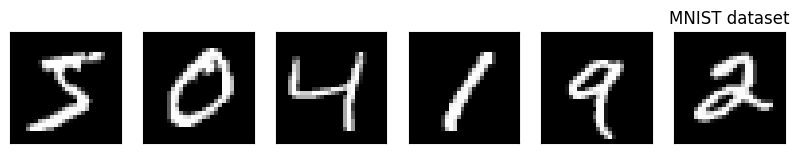

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np



plt.figure(figsize=(10, 10))
for i in range(6):

    plt.subplot(1, 6, i+1, xticks=[], yticks=[])
    plt.imshow(X_train[i], cmap=cm.grey)

plt.title('MNIST dataset')
plt.show()



3. View an Image in More Detail

Image max pixel value: 255
Threshold value: 102.0


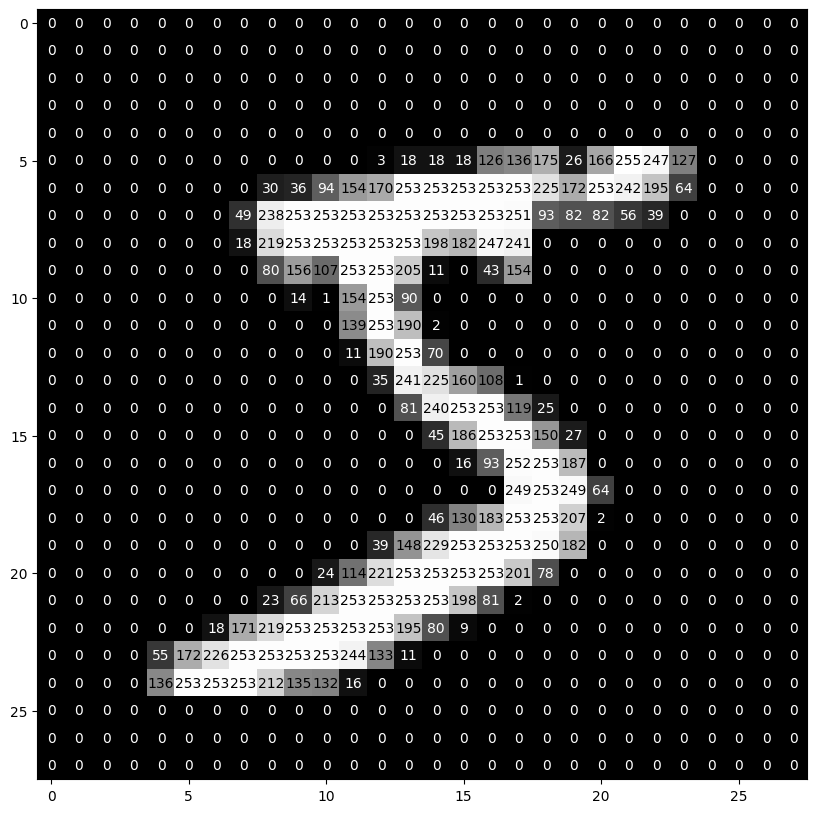

In [ ]:
def visualize_image(image, ax):
    ax.imshow(image, cmap=cm.gray)
    height, width = image.shape

    print("Image max pixel value:", image.max())
    thresh = image.max() / 2.5
    print("Threshold value:", thresh)

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(image[x][y], 2)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if image[x][y] < thresh else 'black')

# Example call
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
visualize_image(X_train[0], ax)
plt.show()


4. Preprocess the input image: Rescale the Images by Dividing Every Pixel in Every Image by 255


In [ ]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=a3e16b07d7b203353b2941cf9a4e252a41ec2526cbe0f3c5843b05cd1f01863b
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [ ]:
# from sklearn.preprocessing import OneHotEncoder # called as nominal encoder

from tensorflow.keras.utils import to_categorical

num_classes = 10
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


 6. Reshape data to fit our CNN (and input_shape) - format (num_images, 28, 28,1)   Grayscale → 1 channel  RGB → 3 channels (Red, Green, Blue)

In [ ]:
# input image dimensions 28x28 pixel images.

img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) #Number of channels (grayscale = 1 channel)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) #Number of channels (grayscale = 1 channel)

input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


7. Model Building (Define the Model Architecture)

You must pass the following arguments:

filters - The number of filters.
kernel_size - Number specifying both the height and width of the (square) convolution window.
There are some additional, optional arguments that you might like to tune:

strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

** Things to remember **

Always add a ReLU activation function to the Conv2D layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
When constructing a network for classification, the final layer in the network should be a Dense layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#intiate Model

model = Sequential()


# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same', input_shape=(28,28,1))) # output of CONV_1 - (28, 28, 32)  - now depth is 32 kernels

# Max Pooling: downsample the image to choose the best features - 2x2 means it will MaxPooling → picks 1 best value from 4.
model.add(MaxPooling2D(pool_size=(2, 2))) #output of maxpooling -- (14, 14, 32)

#CONV2: add another CONV layer  RELU activation and depth = 64 kernels
model.add(Conv2D(64 ,kernel_size=(3, 3), activation='relu', padding='same')) #output of conv2 - (14, 14, 64) - now depth is 32 kernels

# Max Pooling: downsample the image to choose the best features - 2x2 means it will MaxPooling → picks 1 best value from 4.
model.add(MaxPooling2D(pool_size=(2, 2))) #output of maxpooling -- (7, 7, 64)

#we got reduce the image pixel now we can flatten

# flatten since too many dimensions, we only want a classification output

model.add(Flatten()) # input - (7, 7, 64) and get ouput as 	(3136,)

#after flatting we will dense this layer

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu')) # input - (3136,) and get ouput as 	(64,)


# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax')) #digits exists from 0-9

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Things to notice:

- The network begins with a sequence of two convolutional layers, followed by max pooling layers.
- The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.
- The Conv2D depth increases from the input layer of 1 to 32 to 64.
- We also want to decrease the height and width - This is where maxpooling comes in. Notice that the image dimensions decrease from 28 to 14 after the pooling layer.
- You can see that every output shape has **None** in place of the batch-size. This is so as to facilitate changing of batch size at runtime.
- Finally, we add one or more fully connected layers to determine what object is contained in the image. For instance, if wheels were found in the last max pooling layer, this FC layer will transform that information to predict that a car is present in the image with higher probability. If there were eyes, legs and a tails, then this could mean that there is a dog in the image.

8. Compile model - should be used before the training the model

In [ ]:
model.compile(loss='categorical cross entropy', optimizer='rmsprop',
              metrics=['accuracy']) #Root Mean Square Propagation - updates the weight individually, based on how frequently it's updated.


8. Train the Model


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
checkpoint = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)

#epochs - no of times entire dataset pass through the model
# batch_size = Number of training samples processed at once before updating weights

hist = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), callbacks= [checkpoint], verbose=2, shuffle=True)



Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04134, saving model to best_model.h5


1875/1875 - 76s - 40ms/step - accuracy: 0.9576 - loss: 0.1357 - val_accuracy: 0.9868 - val_loss: 0.0413
Epoch 2/10

Epoch 2: val_loss did not improve from 0.04134
1875/1875 - 79s - 42ms/step - accuracy: 0.9865 - loss: 0.0435 - val_accuracy: 0.9853 - val_loss: 0.0465
Epoch 3/10

Epoch 3: val_loss improved from 0.04134 to 0.03448, saving model to best_model.h5


1875/1875 - 80s - 43ms/step - accuracy: 0.9907 - loss: 0.0309 - val_accuracy: 0.9883 - val_loss: 0.0345
Epoch 4/10

Epoch 4: val_loss improved from 0.03448 to 0.03120, saving model to best_model.h5


1875/1875 - 84s - 45ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 5/10

Epoch 5: val_loss improved from 0.03120 to 0.02495, saving model to best_model.h5


1875/1875 - 83s - 44ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.9919 - val_loss: 0.0249
Epoch 6/10

Epoch 6: val_loss did not improve from 0.02495
1875/1875 - 80s - 43ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9916 - val_loss: 0.0313
Epoch 7/10

Epoch 7: val_loss did not improve from 0.02495
1875/1875 - 73s - 39ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9900 - val_loss: 0.0379
Epoch 8/10

Epoch 8: val_loss did not improve from 0.02495
1875/1875 - 78s - 42ms/step - accuracy: 0.9976 - loss: 0.0089 - val_accuracy: 0.9921 - val_loss: 0.0323
Epoch 9/10

Epoch 9: val_loss did not improve from 0.02495
1875/1875 - 84s - 45ms/step - accuracy: 0.9979 - loss: 0.0081 - val_accuracy: 0.9908 - val_loss: 0.0372
Epoch 10/10

Epoch 10: val_loss did not improve from 0.02495
1875/1875 - 79s - 42ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9918 - val_loss: 0.0385


10. MODEL EVALUATION


In [ ]:
# evaluate test accuracy
test_score = model.evaluate(X_test, y_test, verbose=0)

train_score = model.evaluate(X_train, y_train, verbose=0)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

print('Test loss:', train_score[0])
print('Test accuracy:', train_score[1])

Test loss: 0.024945542216300964
Test accuracy: 0.9919000267982483
Test loss: 0.009967640973627567
Test accuracy: 0.9971166849136353


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


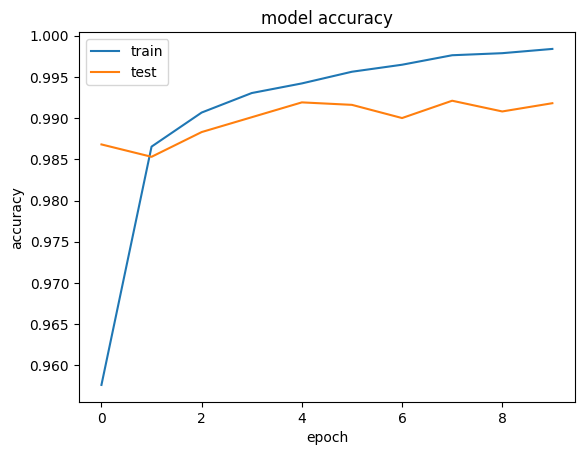

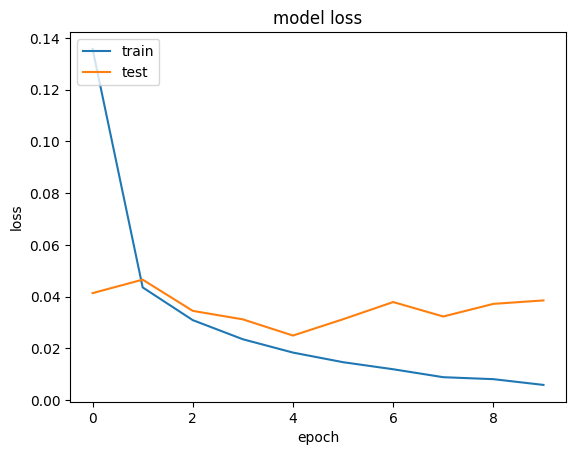

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Access history data
history = hist.history

# list all data in training
print(history.keys())

# summarize training for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

11. load the model

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights(r'/content/best_model.h5')


here we are predicting the new image

Predict on a New Image (Must be grayscale, 28x28)

In [ ]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


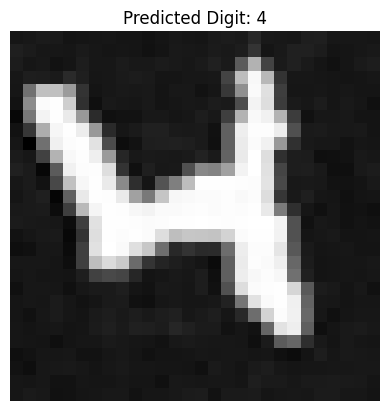

In [ ]:
# 5. Predict on a New Image (Must be grayscale, 28x28)
def predict_new_image(img_path):
    # Load image, convert to grayscale, resize to 28x28
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))

    img = img.astype('float32') / 255.0
    img = img.reshape(1, 28, 28, 1)  #(num_images, 28, 28,1) Grayscale → 1 channel  RGB → 3 channels (Red, Green, Blue)

    # Predict
    prediction = model.predict(img)
    digit = np.argmax(prediction)

    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f'Predicted Digit: {digit}')
    plt.axis('off')
    plt.show()
predict_new_image(r'/content/test_image3.png')